In [1]:
import pandas as pd

# Load your focused base dataset (output from data_Explorer.ipynb)
base_df = pd.read_csv('../data/base_target2_data.csv')  # adjust path if needed

# Quick check
print(base_df.shape)
base_df.head()


(1830, 4)


,date_id,LME_CA_Close,LME_ZS_Close,target_2_shifted
0,0,7205.0,3349.0,-0.007052
1,1,7147.0,3327.0,-0.008934
2,2,7188.5,3362.0,0.011943
3,3,7121.0,3354.0,0.006856
4,4,7125.0,3386.0,-0.016626


In [2]:
# Basic spread feature
base_df['spread'] = base_df['LME_CA_Close'] - base_df['LME_ZS_Close']

# Lag features (up to 3 days)
base_df['spread_lag_1'] = base_df['spread'].shift(1)
base_df['spread_lag_2'] = base_df['spread'].shift(2)
base_df['spread_lag_3'] = base_df['spread'].shift(3)

# Percent change of spread (return signal)
base_df['spread_pct_change_1'] = base_df['spread'].pct_change()

# Rolling stats
base_df['spread_rollmean_5'] = base_df['spread'].rolling(window=5).mean()
base_df['spread_rollstd_5'] = base_df['spread'].rolling(window=5).std()

base_df['spread_rollmean_10'] = base_df['spread'].rolling(window=10).mean()
base_df['spread_rollstd_10'] = base_df['spread'].rolling(window=10).std()

# Drop rows with NaNs introduced by shift/rolling
base_df = base_df.dropna().reset_index(drop=True)


C:\Users\andre\AppData\Local\Temp\ipykernel_7448\327075772.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  base_df['spread_pct_change_1'] = base_df['spread'].pct_change()


Step 1: Quick Summary of All Feature Columns

In [3]:
# Summary of all engineered features
feature_cols = [col for col in base_df.columns if col not in ['date_id', 'target_2_shifted']]

# Basic stats
base_df[feature_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
LME_CA_Close,1475.0,7890.347417,1507.039353,4630.000000,6333.750000,8145.500000,9275.500000,10889.000000
LME_ZS_Close,1475.0,2791.128285,428.820424,1815.500000,2478.000000,2780.500000,3027.750000,4369.000000
spread,1475.0,5099.219132,1277.867531,2811.500000,3674.250000,5452.000000,6233.250000,7775.000000
spread_lag_1,1475.0,5098.426929,1276.742199,2811.500000,3675.500000,5452.000000,6233.250000,7775.000000
spread_lag_2,1475.0,5097.019471,1275.281169,2811.500000,3676.500000,5452.000000,6233.250000,7775.000000
spread_lag_3,1475.0,5095.174047,1273.682817,2811.500000,3678.000000,5452.000000,6230.500000,7637.000000
spread_pct_change_1,1475.0,0.000229,0.016639,-0.114268,-0.009430,0.000261,0.009816,0.079322
spread_rollmean_5,1475.0,5096.677753,1273.101313,2929.800000,3663.300000,5430.100000,6237.150000,7572.500000
spread_rollstd_5,1475.0,69.462895,45.176956,7.224957,38.854054,58.725420,85.868430,393.282100
spread_rollmean_10,1475.0,5092.619368,1269.335885,2946.750000,3656.100000,5388.450000,6253.700000,7347.250000


Step 2: Visualize Key Relationships

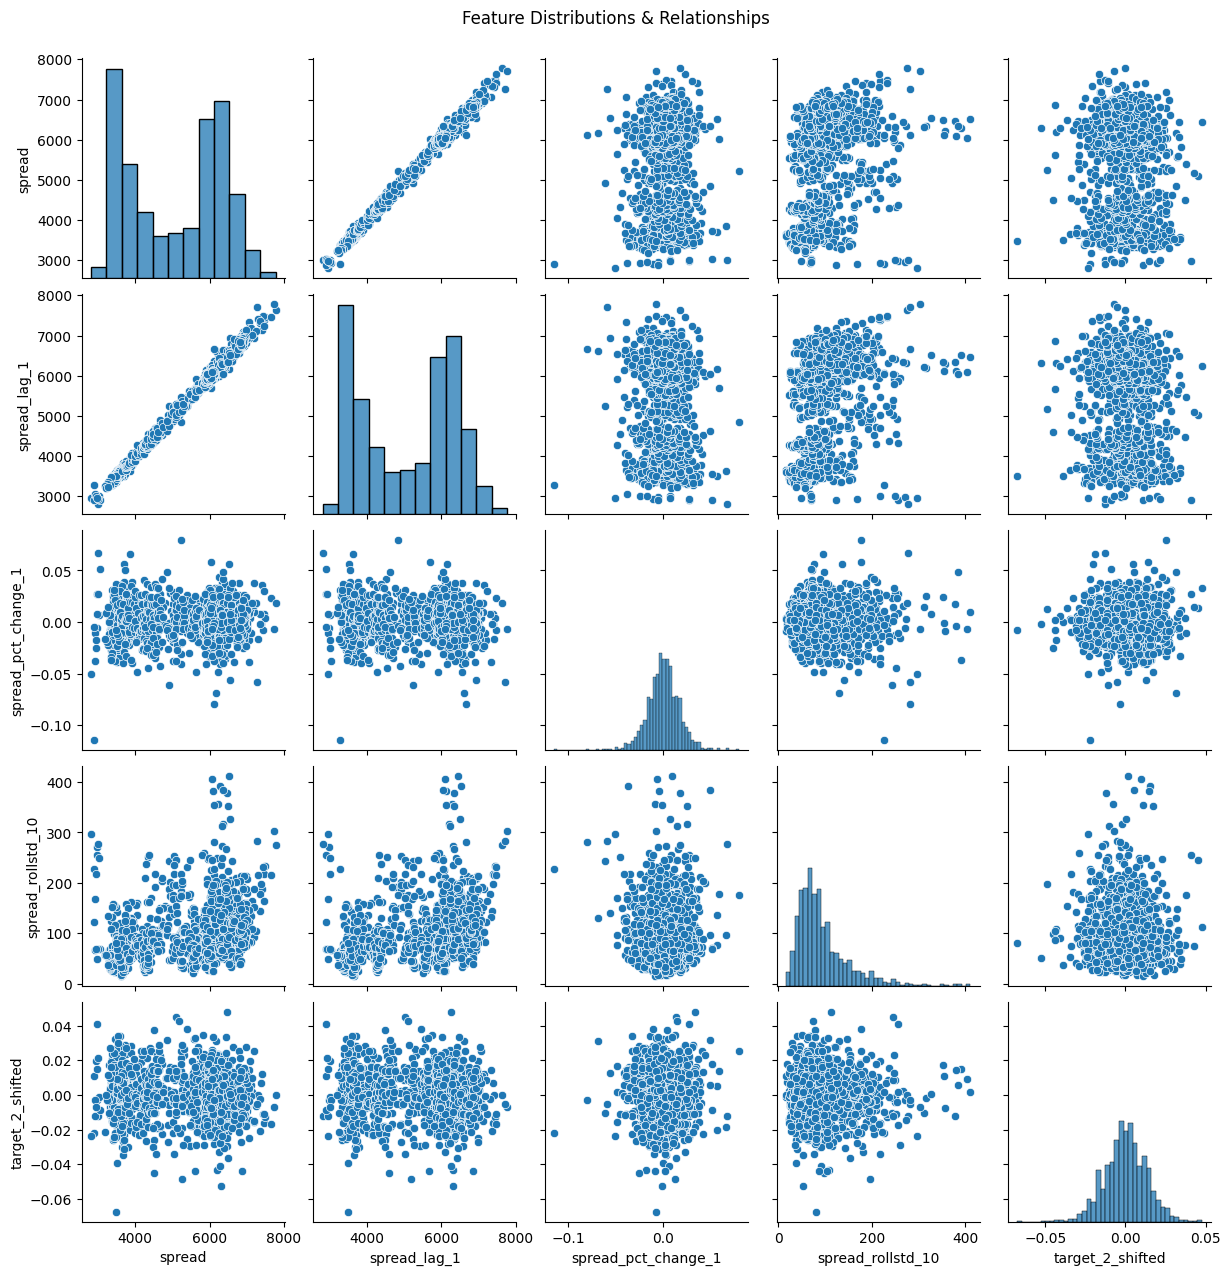

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of most important features vs target
sns.pairplot(base_df[['spread', 'spread_lag_1', 'spread_pct_change_1', 'spread_rollstd_10', 'target_2_shifted']])
plt.suptitle("Feature Distributions & Relationships", y=1.02)
plt.show()


Step 3: Correlation Matrix

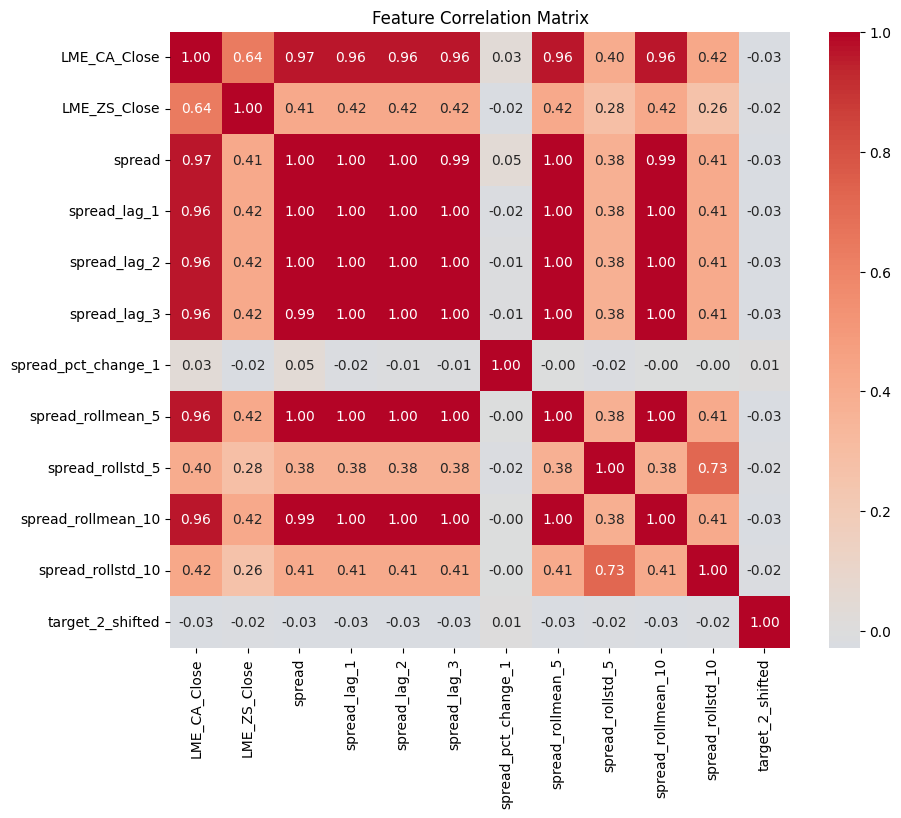

In [5]:
corr = base_df[feature_cols + ['target_2_shifted']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()